In [2]:
import numpy as np
import pandas as pd

# Load data

In [20]:
# Tournament results
tourney_results_m = pd.read_csv('data/MNCAATourneyCompactResults.csv')
tourney_results_w = pd.read_csv('data/WNCAATourneyCompactResults.csv')

In [3]:
tourney_results_m.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [21]:
# Seeds
seeds_m = pd.read_csv('data/MNCAATourneySeeds.csv')
seeds_w = pd.read_csv('data/WNCAATourneySeeds.csv')

In [5]:
seeds_m.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [22]:
# Regular season results
box_scores_m = pd.read_csv('data/MRegularSeasonDetailedResults.csv')
box_scores_w = pd.read_csv('data/WRegularSeasonDetailedResults.csv')

In [7]:
box_scores_m.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


# Build symmetric data frames

In [23]:
tourney_results_m.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [24]:
box_scores_winners_m = (box_scores_m
                        .rename(columns=lambda x: x.replace("W", ""))
                        .rename(columns=lambda x: x.replace("L", "Opp")))
box_scores_losers_m = (box_scores_m
                        .rename(columns=lambda x: x.replace("L", ""))
                        .rename(columns=lambda x: x.replace("W", "Opp")))
#box_scores_winners_m = box_scores_m.rename(columns=lambda x: x.replace("L", "Opp"))
box_scores_winners_m.tail()

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Oppoc,NumOT,FGM,FGA,...,OppFGA3,OppFTM,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF
107629,2023,132,1104,82,1401,63,N,0,27,66,...,15,20,24,17,20,6,13,5,2,21
107630,2023,132,1272,75,1222,65,A,0,27,53,...,25,19,28,22,20,11,10,5,4,19
107631,2023,132,1343,74,1463,65,H,0,23,57,...,22,13,19,6,25,12,10,3,7,20
107632,2023,132,1345,67,1336,65,N,0,24,62,...,23,14,15,4,27,14,10,4,2,20
107633,2023,132,1433,68,1173,56,N,0,24,52,...,22,17,20,16,22,11,8,1,6,21


In [25]:
# QA - should be zero
len(box_scores_winners_m[box_scores_winners_m.OppScore > box_scores_winners_m.Score]) +\
len(box_scores_losers_m[box_scores_losers_m.OppScore < box_scores_losers_m.Score])

0

In [26]:
# Function to build dataframes
def build_sym_df(df):
    winners = (df
        .rename(columns=lambda x: x.replace("W", ""))
        .rename(columns=lambda x: x.replace("L", "Opp")))
    
    losers = (df
        .rename(columns=lambda x: x.replace("L", ""))
        .rename(columns=lambda x: x.replace("W", "Opp")))
    
    winners["Win"] = 1
    losers["Win"] = 0

    full_data = pd.concat([winners, losers]).reset_index().drop(columns="index")
    
    # Since the L in "Loc" is intrepreted as the losing team identifier with the above logic:
    return full_data.rename(columns={"Oppoc": "Loc"})

In [12]:
build_sym_df(tourney_results_m)

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win
0,1985,136,1116,63,1234,54,N,0,1
1,1985,136,1120,59,1345,58,N,0,1
2,1985,136,1207,68,1250,43,N,0,1
3,1985,136,1229,58,1425,55,N,0,1
4,1985,136,1242,49,1325,38,N,0,1
...,...,...,...,...,...,...,...,...,...
4763,2022,146,1274,50,1242,76,N,0,0
4764,2022,146,1389,49,1314,69,N,0,0
4765,2022,152,1437,65,1242,81,N,0,0
4766,2022,152,1181,77,1314,81,N,0,0


In [13]:
build_sym_df(box_scores_m)

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,FGM,FGA,...,OppFTM,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Win
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,1
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,1
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,1
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,1
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213663,2023,113,1328,63,1403,74,A,0,21,59,...,9,14,5,31,11,16,4,1,17,0
213664,2023,113,1103,63,1405,84,H,0,26,59,...,10,13,7,25,16,7,7,7,17,0
213665,2023,113,1461,55,1429,65,A,0,17,54,...,16,22,7,27,11,12,7,3,15,0
213666,2023,113,1386,63,1433,88,A,0,21,56,...,15,18,8,23,14,9,6,5,16,0


In [14]:
# Make sure columns look good
build_sym_df(box_scores_m).columns

Index(['Season', 'DayNum', 'TeamID', 'Score', 'OppTeamID', 'OppScore', 'Loc',
       'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast',
       'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA', 'OppFGM3', 'OppFGA3',
       'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO', 'OppStl',
       'OppBlk', 'OppPF', 'Win'],
      dtype='object')

In [27]:
# Create symmetric dataframes
tourney_results_full_m = build_sym_df(tourney_results_m)
tourney_results_full_w = build_sym_df(tourney_results_w)
box_scores_full_m = build_sym_df(box_scores_m)
box_scores_full_w = build_sym_df(box_scores_w)

In [28]:
# Fix box score location, since all locations are still winners location
def fix_loc(Win, Loc):
    if (Win == 0 and Loc == 'H'):
        return 'A'
    elif (Win == 0 and Loc == 'A'):
        return 'H'
    else:
        return 'N'

fix_loc2 = np.vectorize(fix_loc)

In [29]:
win_m = box_scores_full_m["Win"]
win_w = box_scores_full_w["Win"]
loc_m = box_scores_full_m["Loc"]
loc_w = box_scores_full_w["Loc"]

box_scores_full_m["Loc"] = fix_loc2(win_m, loc_m)
box_scores_full_w["Loc"] = fix_loc2(win_w, loc_w)

In [30]:
box_scores_full_m

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,FGM,FGA,...,OppFTM,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Win
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,1
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,1
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,1
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,1
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215263,2023,132,1401,63,1104,82,N,0,19,64,...,16,22,21,29,16,12,6,7,19,0
215264,2023,132,1222,65,1272,75,H,0,20,64,...,15,21,9,27,11,11,4,2,18,0
215265,2023,132,1463,65,1343,74,A,0,22,50,...,19,24,11,25,11,5,3,2,18,0
215266,2023,132,1336,65,1345,67,N,0,22,51,...,13,20,13,25,17,7,5,0,14,0


## Add Seeds

In [19]:
len(tourney_results_full_m)

4768

In [20]:
seeds_m

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2417,2022,Z13,1151
2418,2022,Z14,1255
2419,2022,Z15,1174
2420,2022,Z16a,1136


In [21]:
# Add seeds
tourney_results_seeds_m = (tourney_results_full_m
                           .merge(seeds_m, on=["Season", "TeamID"])
                           .merge(seeds_m.rename(columns={"Seed": "OppSeed"}), 
                                  left_on=["Season", "OppTeamID"],
                                  right_on=["Season", "TeamID"],
                                  suffixes=[None, "_y"]
                                )
                            .drop(columns="TeamID_y"))
tourney_results_seeds_w = (tourney_results_full_w
                           .merge(seeds_w, on=["Season", "TeamID"])
                           .merge(seeds_w.rename(columns={"Seed": "OppSeed"}), 
                                  left_on=["Season", "OppTeamID"],
                                  right_on=["Season", "TeamID"],
                                  suffixes=[None, "_y"]
                                )
                            .drop(columns="TeamID_y"))

In [22]:
tourney_results_seeds_w["Seed"].isna().sum()

0

In [23]:
tourney_results_seeds_w["OppSeed"].isna().sum()

0

In [24]:
# Seed Number and region
tourney_results_seeds_w.head()

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed
0,1998,137,3104,94,3422,46,H,0,1,X02,X15
1,1998,139,3104,75,3417,74,H,0,1,X02,X07
2,1998,137,3276,58,3417,65,H,0,0,X10,X07
3,1998,145,3104,57,3256,71,A,0,0,X02,X03
4,1998,151,3301,65,3256,84,H,0,0,W04,X03


In [25]:
tourney_results_seeds_m["Region"] = tourney_results_seeds_m["Seed"].str.extract('([A-Z])')
tourney_results_seeds_m["OppRegion"] = tourney_results_seeds_m["OppSeed"].str.extract('([A-Z])')

In [26]:
tourney_results_seeds_m["Seed"] = tourney_results_seeds_m["Seed"].str.extract('([0-9]+)').astype(int)
tourney_results_seeds_m["OppSeed"] = tourney_results_seeds_m["OppSeed"].str.extract('([0-9]+)').astype(int)

In [27]:
tourney_results_seeds_m.head()

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion
0,1985,136,1116,63,1234,54,N,0,1,9,8,X,X
1,1985,138,1116,65,1385,68,N,0,0,9,1,X,X
2,1985,152,1207,77,1385,59,N,0,1,1,1,W,X
3,1985,144,1246,70,1385,86,N,0,0,12,1,X,X
4,1985,146,1301,60,1385,69,N,0,0,3,1,X,X


In [28]:
# Check for duplicates in non play-in games
tourney_results_seeds_m.query("Seed == OppSeed and Region == OppRegion and DayNum > 135") #ok

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion
4502,2021,136,1179,53,1455,52,N,0,1,11,11,X,X
4507,2021,136,1313,54,1111,53,N,0,1,16,16,X,X
4514,2021,136,1411,60,1291,52,N,0,1,16,16,W,W
4519,2021,136,1417,86,1277,80,N,1,1,11,11,W,W
4594,2021,136,1277,80,1417,86,N,1,0,11,11,W,W
4610,2021,136,1111,53,1313,54,N,0,0,16,16,X,X
4623,2021,136,1291,52,1411,60,N,0,0,16,16,W,W
4629,2021,136,1455,52,1179,53,N,0,0,11,11,X,X


In [29]:
tourney_results_seeds_w["Region"] = tourney_results_seeds_w["Seed"].str.extract('([A-Z])')
tourney_results_seeds_w["OppRegion"] = tourney_results_seeds_w["OppSeed"].str.extract('([A-Z])')
tourney_results_seeds_w["Seed"] = tourney_results_seeds_w["Seed"].str.extract('([0-9]+)').astype(int)
tourney_results_seeds_w["OppSeed"] = tourney_results_seeds_w["OppSeed"].str.extract('([0-9]+)').astype(int)

In [30]:
tourney_results_seeds_w

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion
0,1998,137,3104,94,3422,46,H,0,1,2,15,X,X
1,1998,139,3104,75,3417,74,H,0,1,2,7,X,X
2,1998,137,3276,58,3417,65,H,0,0,10,7,X,X
3,1998,145,3104,57,3256,71,A,0,0,2,3,X,X
4,1998,151,3301,65,3256,84,H,0,0,4,3,W,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,2022,138,3397,80,3138,67,H,0,1,4,13,Z,Z
3028,2022,140,3397,70,3125,67,H,0,1,4,12,Z,Z
3029,2022,138,3332,70,3125,73,N,2,0,5,12,Z,Z
3030,2022,138,3416,69,3196,52,N,0,1,7,10,W,W


In [31]:
# Check for duplicates in non play-in games
tourney_results_seeds_w.query("Seed == OppSeed and Region == OppRegion and DayNum > 134") #ok

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion
2898,2022,135,3173,88,3177,57,N,0,1,11,11,Y,Y
2901,2022,135,3224,55,3230,51,N,0,1,16,16,Y,Y
2908,2022,136,3255,74,3291,70,N,0,1,16,16,W,W
2913,2022,136,3283,61,3199,50,N,0,1,11,11,X,X
2932,2022,135,3177,57,3173,88,N,0,0,11,11,Y,Y
2966,2022,135,3230,51,3224,55,N,0,0,16,16,Y,Y
3009,2022,136,3291,70,3255,74,N,0,0,16,16,W,W
3022,2022,136,3199,50,3283,61,N,0,0,11,11,X,X


In [32]:
# Check for 16 seeds beating 1 seeds (should just be 1 for men - 2018)
tourney_results_seeds_m.query("Seed == 1 and OppSeed == 16 and Win == 0")

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion
4349,2018,137,1438,54,1420,74,N,0,0,1,16,Y,Y


In [33]:
# Check for 16 seeds beating 1 seeds (should just be 1 for women - 1998)
tourney_results_seeds_w.query("Seed == 1 and OppSeed == 16 and Win == 0")

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion
86,1998,138,3390,67,3217,71,A,0,0,1,16,Z,Z


# EDA

## Seeds

In [34]:
# Average win % by seed - Men
(tourney_results_seeds_m
 .query("DayNum > 135")
 .groupby("Seed")["Win"].mean())

Seed
1     0.799677
2     0.708758
3     0.653846
4     0.605898
5     0.527157
6     0.513245
7     0.473118
8     0.421260
9     0.372881
10    0.384937
11    0.397590
12    0.342222
13    0.200000
14    0.139535
15    0.086420
16    0.019608
Name: Win, dtype: float64

In [35]:
# Average win % by seed - Women
(tourney_results_seeds_w
 .query("DayNum > 135")
 .groupby("Seed")["Win"].mean())

Seed
1     0.830735
2     0.737892
3     0.671233
4     0.636364
5     0.551402
6     0.492063
7     0.469613
8     0.337931
9     0.355705
10    0.294118
11    0.326389
12    0.193277
13    0.076923
14    0.000000
15    0.000000
16    0.020202
Name: Win, dtype: float64

## Public Ratings

In [36]:
tourney_results_seeds_m.head()

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion
0,1985,136,1116,63,1234,54,N,0,1,9,8,X,X
1,1985,138,1116,65,1385,68,N,0,0,9,1,X,X
2,1985,152,1207,77,1385,59,N,0,1,1,1,W,X
3,1985,144,1246,70,1385,86,N,0,0,12,1,X,X
4,1985,146,1301,60,1385,69,N,0,0,3,1,X,X


In [37]:
# Load data
ratings_m = pd.read_csv("data/MMasseyOrdinals.csv")

In [38]:
ratings_m["Season"].min()

2003

In [39]:
kenpom = ratings_m.query("SystemName == 'POM'")

In [40]:
kenpom.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
2968,2003,37,POM,1102,104
2969,2003,37,POM,1103,191
2970,2003,37,POM,1104,15
2971,2003,37,POM,1105,319
2972,2003,37,POM,1106,170


In [41]:
kenpom_final = kenpom.query("RankingDayNum == 133")

In [42]:
kenpom_final.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
127259,2003,133,POM,1102,160
127260,2003,133,POM,1103,163
127261,2003,133,POM,1104,33
127262,2003,133,POM,1105,307
127263,2003,133,POM,1106,263


In [43]:
# Join final ratings to tourney results
(tourney_results_seeds_m
 .merge(kenpom_final, how="left", on=["Season", "TeamID"]))

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Seed,OppSeed,Region,OppRegion,RankingDayNum,SystemName,OrdinalRank
0,1985,136,1116,63,1234,54,N,0,1,9,8,X,X,NaN,NaN,NaN
1,1985,138,1116,65,1385,68,N,0,0,9,1,X,X,NaN,NaN,NaN
2,1985,152,1207,77,1385,59,N,0,1,1,1,W,X,NaN,NaN,NaN
3,1985,144,1246,70,1385,86,N,0,0,12,1,X,X,NaN,NaN,NaN
4,1985,146,1301,60,1385,69,N,0,0,3,1,X,X,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,2022,137,1104,64,1323,78,N,0,0,6,11,X,X,133.0,POM,25.0
4764,2022,137,1437,80,1174,60,N,0,1,2,15,Z,Z,133.0,POM,11.0
4765,2022,139,1437,71,1326,61,N,0,1,2,7,Z,Z,133.0,POM,11.0
4766,2022,137,1260,41,1326,54,N,0,0,10,7,Z,Z,133.0,POM,24.0


Ratings only go back to 2003...

## Team season stats

In [19]:
# Regular season
box_score_sum_m = box_scores_full_m.groupby(["Season", "TeamID"]).sum().reset_index()
box_score_sum_w = box_scores_full_w.groupby(["Season", "TeamID"]).sum().reset_index()

NameError: name 'box_scores_full_m' is not defined

In [45]:
# Games played
games_played_m = box_scores_full_m.groupby(["Season", "TeamID"]).agg(GP = ("Score", "count")).reset_index()
games_played_w = box_scores_full_w.groupby(["Season", "TeamID"]).agg(GP = ("Score", "count")).reset_index()

In [46]:
games_played_m.query("Season == 2022").max()

Season    2022
TeamID    1472
GP          35
dtype: int64

In [47]:
box_score_sum_m = box_score_sum_m.merge(games_played_m, on=["Season", "TeamID"])
box_score_sum_w = box_score_sum_w.merge(games_played_w, on=["Season", "TeamID"])

In [48]:
box_score_sum_m

,Season,TeamID,DayNum,Score,OppTeamID,OppScore,NumOT,FGM,FGA,FGM3,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Win,GP
0,2003,1102,2029,1603,36930,1596,0,536,1114,219,...,539,269,564,256,363,152,44,514,12,28
1,2003,1103,2078,2127,33977,2110,8,733,1508,147,...,598,325,595,418,414,173,77,606,13,27
2,2003,1104,2032,1940,35914,1820,1,673,1601,178,...,480,305,634,327,388,155,89,539,17,28
3,2003,1105,2036,1866,33024,1993,4,634,1602,197,...,637,343,686,411,489,244,109,496,7,26
4,2003,1106,2072,1781,34867,1785,1,656,1548,171,...,615,317,626,330,422,246,89,452,13,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,2023,1473,1611,1694,33910,1924,2,619,1477,188,...,474,240,654,388,305,186,82,374,6,26
7251,2023,1474,1652,2012,32779,1986,0,683,1546,242,...,390,216,619,359,274,169,107,463,14,26
7252,2023,1475,1640,1973,33606,1995,3,682,1587,254,...,601,191,616,335,298,164,110,480,12,26
7253,2023,1476,1703,1940,37090,2058,3,670,1534,222,...,467,276,710,408,372,202,86,478,13,29


In [49]:
box_score_sum_m.columns

Index(['Season', 'TeamID', 'DayNum', 'Score', 'OppTeamID', 'OppScore', 'NumOT',
       'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA', 'OppFGM3', 'OppFGA3', 'OppFTM',
       'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO', 'OppStl', 'OppBlk',
       'OppPF', 'Win', 'GP'],
      dtype='object')

### Four factors (plus other important stats)

Possessions: FGA - OR + TO + .475 *  FTA
Per NCAA: https://www.ncaa.com/news/basketball-men/article/2022-12-05/college-basketballs-net-rankings-explained#:~:text=The%20NET%20includes%20more%20components,quality%20of%20wins%20and%20losses.&text=It's%20both%20a%20results%2Ddriven%20and%20predictive%20metric.

Effective field goal percentage:  eFG%  = (.5 * 3FGM + FGM) / FGA<br>
            Turnover percentage:    TO% = TO / Possessions<br>
Offensive rebounding percentage:    OR% = OR / (OR + OppDR)<br>
                Free throw rate: FTRate = FTA / FGA

In [50]:
ff_plus_m = (box_score_sum_m
 .assign(
    Poss = lambda x: x.FGA - x.OR + x.TO + .475 * x.FTA,
    Tempo = lambda x: x.Poss / x.GP,
    EFG_pct = lambda x: ((.5 * x.FGM3) + x.FGM) / x.FGA,
    TO_pct = lambda x: x.TO / x.Poss,
    OR_pct = lambda x: x.OR / (x.OR + x.OppDR),
    FTR = lambda x: x.FTA / x.FGM,
    FT_pct = lambda x: x.FTM / x.FTA,
    PF_pg = lambda x: x.PF / x.GP,
    FG3_pct = lambda x: x.FGM3/x.FGA3
 )
 .filter(["Season", "TeamID", "Tempo", "EFG_pct", "TO_pct", "OR_pct", "FTR", "FT_pct", "PF_pg", "FG3_pct"]))

ff_plus_w = (box_score_sum_w
 .assign(
    Poss = lambda x: x.FGA - x.OR + x.TO + .475 * x.FTA,
    Tempo = lambda x: x.Poss / x.GP,
    EFG_pct = lambda x: ((.5 * x.FGM3) + x.FGM) / x.FGA,
    TO_pct = lambda x: x.TO / x.Poss,
    OR_pct = lambda x: x.OR / (x.OR + x.OppDR),
    FTR = lambda x: x.FTA / x.FGM,
    FT_pct = lambda x: x.FTM / x.FTA,
    PF_pg = lambda x: x.PF / x.GP,
    FG3_pct = lambda x: x.FGM3/x.FGA3
 )
 .filter(["Season", "TeamID", "Tempo", "EFG_pct", "TO_pct", "OR_pct", "FTR", "FT_pct", "PF_pg", "FG3_pct"]))

In [51]:
ff_plus_m

,Season,TeamID,Tempo,EFG_pct,TO_pct,OR_pct,FTR,FT_pct,PF_pg,FG3_pct
0,2003,1102,55.161607,0.579443,0.207183,0.171806,0.893657,0.651357,18.750000,0.375643
1,2003,1103,70.983333,0.534814,0.177924,0.307334,0.952251,0.736390,19.851852,0.338710
2,2003,1104,66.833929,0.475953,0.198787,0.374753,0.870728,0.709898,18.035714,0.320144
3,2003,1105,77.146154,0.457241,0.241799,0.338476,0.895899,0.705986,20.230769,0.364815
4,2003,1106,67.856250,0.479005,0.251056,0.354639,0.702744,0.646421,18.178571,0.346154
...,...,...,...,...,...,...,...,...,...,...
7250,2023,1473,69.356731,0.482735,0.181891,0.212996,0.596123,0.726287,16.000000,0.354717
7251,2023,1474,71.985577,0.520052,0.165097,0.285219,0.812592,0.727928,16.038462,0.349711
7252,2023,1475,73.111538,0.509767,0.173076,0.300000,0.768328,0.677481,18.423077,0.375185
7253,2023,1476,68.693966,0.509126,0.185731,0.171529,0.738806,0.763636,15.172414,0.351266


In [52]:
tourney_results_full_m.head()

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win
0,1985,136,1116,63,1234,54,N,0,1
1,1985,136,1120,59,1345,58,N,0,1
2,1985,136,1207,68,1250,43,N,0,1
3,1985,136,1229,58,1425,55,N,0,1
4,1985,136,1242,49,1325,38,N,0,1


In [53]:
ff_plus_tourney_m = (tourney_results_full_m
 .merge(ff_plus_m, on=["Season", "TeamID"]))

ff_plus_tourney_w = (tourney_results_full_w
 .merge(ff_plus_w, on=["Season", "TeamID"]))

In [54]:
ff_plus_tourney_m.head()

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Tempo,EFG_pct,TO_pct,OR_pct,FTR,FT_pct,PF_pg,FG3_pct
0,2003,134,1421,92,1411,84,N,1,1,70.666379,0.486339,0.229344,0.349705,0.858557,0.762768,19.103448,0.360153
1,2003,137,1421,61,1400,82,N,0,0,70.666379,0.486339,0.229344,0.349705,0.858557,0.762768,19.103448,0.360153
2,2003,136,1112,80,1436,51,N,0,1,77.196429,0.514946,0.191534,0.394615,0.824499,0.701429,17.750000,0.350534
3,2003,138,1112,96,1211,95,N,2,1,77.196429,0.514946,0.191534,0.394615,0.824499,0.701429,17.750000,0.350534
4,2003,143,1112,88,1323,71,N,0,1,77.196429,0.514946,0.191534,0.394615,0.824499,0.701429,17.750000,0.350534


In [55]:
# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Correlation matrix
ff_plus_tourney_m.corr().loc["Win",].sort_values()

C:\Users\CBell\AppData\Local\Temp\ipykernel_13528\1339876089.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ff_plus_tourney_m.corr().loc["Win",].sort_values()


OppScore    -0.48
TO_pct      -0.12
FTR         -0.09
PF_pg       -0.06
TeamID      -0.00
Season      -0.00
NumOT        0.00
DayNum       0.00
OppTeamID    0.00
Tempo        0.01
FT_pct       0.03
FG3_pct      0.07
EFG_pct      0.12
OR_pct       0.13
Score        0.48
Win          1.00
Name: Win, dtype: float64

### Marginal averages vs. opponent

In [56]:
ff_plus_tourney_m.head()

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,Tempo,EFG_pct,TO_pct,OR_pct,FTR,FT_pct,PF_pg,FG3_pct
0,2003,134,1421,92,1411,84,N,1,1,70.67,0.49,0.23,0.35,0.86,0.76,19.10,0.36
1,2003,137,1421,61,1400,82,N,0,0,70.67,0.49,0.23,0.35,0.86,0.76,19.10,0.36
2,2003,136,1112,80,1436,51,N,0,1,77.20,0.51,0.19,0.39,0.82,0.70,17.75,0.35
3,2003,138,1112,96,1211,95,N,2,1,77.20,0.51,0.19,0.39,0.82,0.70,17.75,0.35
4,2003,143,1112,88,1323,71,N,0,1,77.20,0.51,0.19,0.39,0.82,0.70,17.75,0.35


In [57]:
ff_margins_m = (ff_plus_tourney_m
 .merge(ff_plus_m, 
        left_on=["Season", "OppTeamID"], 
        right_on=["Season", "TeamID"],
        suffixes=[None, "Opp"])
 #.drop(columns=["Score", "OppScore", "Loc", "NumOT", "TeamIDOpp"])
 .assign(
    Tempo = lambda x: x.Tempo - x.TempoOpp,
    EFG = lambda x: x.EFG_pct - x.EFG_pctOpp,
    TO = lambda x: x.TO_pct - x.TO_pctOpp,
    OR = lambda x: x.OR_pct - x.OR_pctOpp,
    FTR = lambda x: x.FTR - x.FTROpp,
    FTP = lambda x: x.FT_pct - x.FT_pctOpp,
    PF = lambda x: x.PF_pg - x.PF_pgOpp
 )
 .filter(["Season", "DayNum", "TeamID", "OppTeamID", "Tempo", "EFG", "TO", "OR", "FTR", "FTP", "PF", "Win"]))

In [58]:
ff_margins_m.head()

,Season,DayNum,TeamID,OppTeamID,Tempo,EFG,TO,OR,FTR,FTP,PF,Win
0,2003,134,1421,1411,0.00,-0.01,0.01,-0.02,-0.28,0.14,0.80,1
1,2003,137,1421,1400,-0.31,-0.01,0.04,-0.07,0.01,0.05,-1.25,0
2,2003,144,1163,1400,2.75,0.03,0.03,-0.02,-0.10,-0.04,-1.96,0
3,2003,146,1277,1400,-5.50,0.00,0.03,-0.08,0.11,0.02,-0.32,0
4,2003,139,1345,1400,-1.04,-0.01,0.01,-0.12,0.22,0.04,-0.54,0


In [59]:
ff_margins_m.corr().loc["Win",].sort_values()

TO          -0.19
PF          -0.17
FTR         -0.15
TeamID      -0.00
Season      -0.00
DayNum      -0.00
OppTeamID    0.00
Tempo        0.02
FTP          0.04
EFG          0.18
OR           0.21
Win          1.00
Name: Win, dtype: float64

In [60]:
ff_margins_final_m = ff_margins_m[["Season","DayNum","TeamID", "OppTeamID", "EFG", "TO", "OR", "FTR", "PF", "Win"]]

In [61]:
# Repeat for women
ff_margins_w = (ff_plus_tourney_w
 .merge(ff_plus_w, 
        left_on=["Season", "OppTeamID"], 
        right_on=["Season", "TeamID"],
        suffixes=[None, "Opp"])
 #.drop(columns=["Score", "OppScore", "Loc", "NumOT", "TeamIDOpp"])
 .assign(
    Tempo = lambda x: x.Tempo - x.TempoOpp,
    EFG = lambda x: x.EFG_pct - x.EFG_pctOpp,
    TO = lambda x: x.TO_pct - x.TO_pctOpp,
    OR = lambda x: x.OR_pct - x.OR_pctOpp,
    FTR = lambda x: x.FTR - x.FTROpp,
    FTP = lambda x: x.FT_pct - x.FT_pctOpp,
    PF = lambda x: x.PF_pg - x.PF_pgOpp
 )
 .filter(["Season", "DayNum", "TeamID", "OppTeamID", "Tempo", "EFG", "TO", "OR", "FTR", "FTP", "PF", "Win"]))

In [62]:
ff_margins_w.corr().loc["Win",].sort_values()

PF          -0.24
TO          -0.22
FTR         -0.22
TeamID      -0.01
DayNum       0.00
Season       0.00
OppTeamID    0.01
FTP          0.09
Tempo        0.14
OR           0.33
EFG          0.37
Win          1.00
Name: Win, dtype: float64

In [63]:
ff_margins_final_w = ff_margins_w[["Season","DayNum","TeamID", "OppTeamID", "EFG", "TO", "OR", "FTR", "PF", "Tempo", "Win"]]

## Coaches

In [64]:
coaches_m = pd.read_csv('data/MTeamCoaches.csv')

In [65]:
coaches_m

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney
...,...,...,...,...,...
12789,2023,1473,0,113,kyle_gerdeman
12790,2023,1474,0,113,grant_leonard
12791,2023,1475,0,113,stan_gouard
12792,2023,1476,0,113,chris_kraus


In [66]:
# Check for coaches with same name
(coaches_m
 .groupby(["Season", "CoachName"])["TeamID"]
 .count()
 .sort_values(ascending=False))

Season  CoachName       
2001    lute_olson          2
1985    a_b_williamson      1
2012    ben_jacobson        1
        andrew_toole        1
        andy_enfield        1
                           ..
1999    eddie_biedenbach    1
        eddie_fogler        1
        eddie_mccarter      1
        eddie_payne         1
2023    zach_spiker         1
Name: TeamID, Length: 12793, dtype: int64

In [67]:
coaches_m.query("CoachName == 'lute_olson' and Season == 2001")

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
4820,2001,1112,0,59,lute_olson
4822,2001,1112,77,154,lute_olson


In [68]:
coaches_m.query("TeamID == 1112 and Season == 2001")

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
4820,2001,1112,0,59,lute_olson
4821,2001,1112,60,76,jim_rosborough
4822,2001,1112,77,154,lute_olson


In [69]:
coaches_in_tourney = coaches_m.query("LastDayNum == 154")

In [70]:
# Total seasons for coaches
coach_first_seasons = (coaches_in_tourney
 .groupby("CoachName")["Season"]
 .min()
 .reset_index()
 .rename(columns={"Season": "First_Season"}))
coach_first_seasons.head()

,CoachName,First_Season
0,a_b_williamson,1985
1,a_w_hamilton,2019
2,aaron_james,1990
3,aaron_mckie,2020
4,abe_lemons,1985


In [71]:
# Seasons with team for coaches
coach_team_first_seasons = (coaches_in_tourney
 .groupby(["CoachName", "TeamID"])["Season"]
 .min()
 .reset_index()
 .rename(columns={"Season": "First_Team_Season"}))
coach_team_first_seasons.head()

,CoachName,TeamID,First_Team_Season
0,a_b_williamson,1224,1985
1,a_w_hamilton,1184,2019
2,aaron_james,1212,1990
3,aaron_mckie,1396,2020
4,abe_lemons,1327,1985


In [72]:
coach_seasons = (coaches_in_tourney
 .merge(coach_first_seasons)
 .merge(coach_team_first_seasons)
 .assign(
    CoachSeasons = lambda x: x.Season - x.First_Season,
    CoachTeamSeasons = lambda x: x.Season - x.First_Team_Season)
 .filter(["Season", "TeamID", "CoachSeasons", "CoachTeamSeasons"])
)

In [73]:
coach_seasons

,Season,TeamID,CoachSeasons,CoachTeamSeasons
0,1985,1102,0,0
1,1986,1102,1,1
2,1987,1102,2,2
3,1988,1102,3,3
4,1989,1102,4,4
...,...,...,...,...
12304,2022,1403,0,0
12305,2022,1424,0,0
12306,2022,1426,0,0
12307,2022,1441,0,0


### Does coaching tenure affect tournament?

In [74]:
import matplotlib.pyplot as plt

In [75]:
coach_tourney = (tourney_results_full_m
 .merge(coach_seasons)
 .filter(["CoachSeasons", "CoachTeamSeasons", "Win"]))

(array([1245., 1089.,  760.,  478.,  467.,  304.,  146.,  152.,   91.,
          36.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

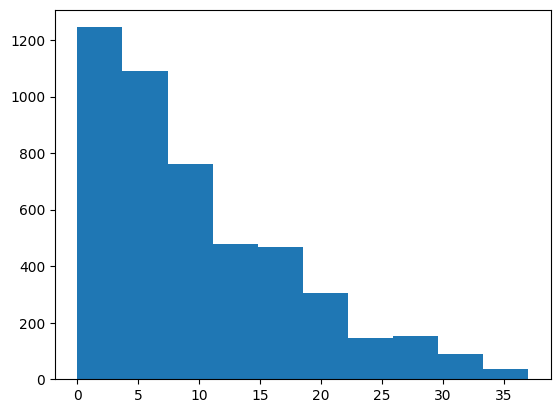

In [76]:
# Histogram of games played by coaches
plt.hist(coach_tourney["CoachSeasons"])

<Axes: xlabel='CoachSeasons', ylabel='Win'>

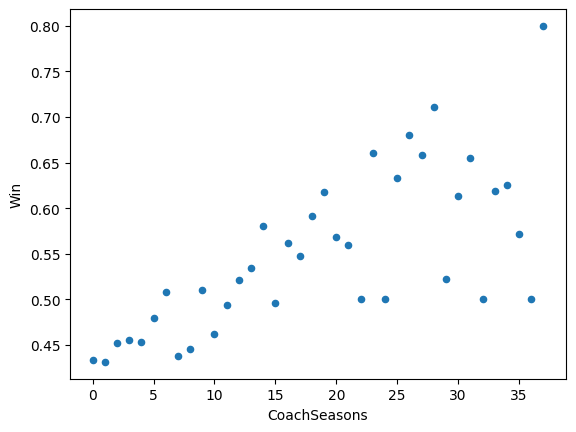

In [77]:
(coach_tourney
 .groupby("CoachSeasons")["Win"]
 .mean()
 .reset_index()
 .plot.scatter(x="CoachSeasons", y="Win"))

<Axes: xlabel='CoachTeamSeasons', ylabel='Win'>

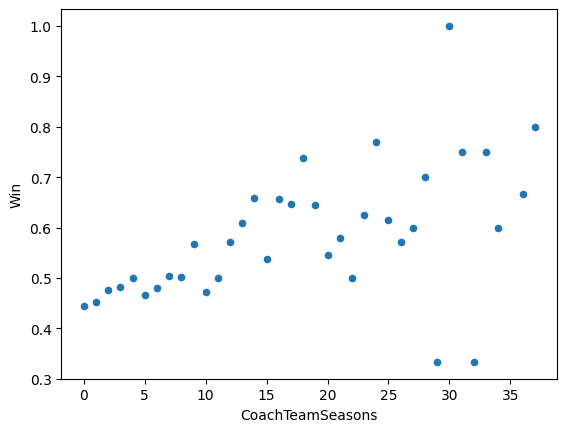

In [78]:
(coach_tourney
 .groupby("CoachTeamSeasons")["Win"]
 .mean()
 .reset_index()
 .plot.scatter(x="CoachTeamSeasons", y="Win"))

In [79]:
(tourney_results_full_m
 .merge(coach_seasons)
 .query("CoachSeasons <= 20")
 .filter(["CoachSeasons", "CoachTeamSeasons", "Win"])
 .corr()["Win"])

CoachSeasons       0.09
CoachTeamSeasons   0.08
Win                1.00
Name: Win, dtype: float64

We'll go with total seasons for simplicity since they have similar effects

In [80]:
coach_seasons_final = coach_seasons.drop(columns="CoachTeamSeasons")

In [81]:
coach_seasons_final

,Season,TeamID,CoachSeasons
0,1985,1102,0
1,1986,1102,1
2,1987,1102,2
3,1988,1102,3
4,1989,1102,4
...,...,...,...
12304,2022,1403,0
12305,2022,1424,0
12306,2022,1426,0
12307,2022,1441,0


# Conferences

## Does conference strength affect results?

In [82]:
conferences = pd.read_csv("data/Conferences.csv")
team_conf_m = pd.read_csv('data/MTeamConferences.csv')
team_conf_w = pd.read_csv('data/WTeamConferences.csv')

In [83]:
conferences.head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


In [84]:
len(team_conf_m)

12662

In [85]:
team_conf_m.head()

,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac


In [86]:
conf_seeds_m = seeds_m.merge(team_conf_m, on=["Season", "TeamID"]).drop(columns="Seed")
conf_seeds_w = seeds_w.merge(team_conf_w, on=["Season", "TeamID"]).drop(columns="Seed")

In [87]:
conf_seeds_m.head()

,Season,TeamID,ConfAbbrev
0,1985,1207,big_east
1,1985,1210,acc
2,1985,1228,big_ten
3,1985,1260,mw_city
4,1985,1374,swc


In [88]:
len(conf_seeds_m)

2422

In [89]:
# Bids by conference
conf_bids_m = (conf_seeds_m
 .groupby(["Season", "ConfAbbrev"])["TeamID"]
 .count()
 .reset_index()
 .rename(columns={"TeamID": "ConfBids"}))

conf_bids_w = (conf_seeds_w
 .groupby(["Season", "ConfAbbrev"])["TeamID"]
 .count()
 .reset_index()
 .rename(columns={"TeamID": "ConfBids"}))

In [90]:
conf_bids_m.head()

,Season,ConfAbbrev,ConfBids
0,1985,a_sun,1
1,1985,a_ten,1
2,1985,acc,5
3,1985,big_east,6
4,1985,big_eight,3


In [91]:
len(conf_bids_m)

1150

In [92]:
sos_m = (tourney_results_full_m
 .merge(conf_seeds_m, on=["Season", "TeamID"])
 .merge(conf_seeds_m, left_on=["Season", "OppTeamID"], right_on=["Season", "TeamID"], suffixes=[None, "Opp"])
 .merge(conf_bids_m, on=["Season", "ConfAbbrev"])
 .merge(conf_bids_m, left_on=["Season", "ConfAbbrevOpp"], right_on=["Season", "ConfAbbrev"], suffixes=[None, "Opp"])
 .drop(columns=["ConfAbbrev", "ConfAbbrevOpp"])
 .filter(["Season", "TeamID", "ConfBids", "ConfBidsOpp"])
 .assign(ConfCompare = lambda x: x.ConfBids - x.ConfBidsOpp)
)

sos_w = (tourney_results_full_w
 .merge(conf_seeds_w, on=["Season", "TeamID"])
 .merge(conf_seeds_w, left_on=["Season", "OppTeamID"], right_on=["Season", "TeamID"], suffixes=[None, "Opp"])
 .merge(conf_bids_w, on=["Season", "ConfAbbrev"])
 .merge(conf_bids_w, left_on=["Season", "ConfAbbrevOpp"], right_on=["Season", "ConfAbbrev"], suffixes=[None, "Opp"])
 .drop(columns=["ConfAbbrev", "ConfAbbrevOpp"])
 .filter(["Season", "TeamID", "ConfBids", "ConfBidsOpp"])
 .assign(ConfCompare = lambda x: x.ConfBids - x.ConfBidsOpp)
)


In [93]:
(tourney_results_full_m
 .merge(conf_seeds_m, on=["Season", "TeamID"])
 .merge(conf_seeds_m, left_on=["Season", "OppTeamID"], right_on=["Season", "TeamID"], suffixes=[None, "Opp"])
 .merge(conf_bids_m, on=["Season", "ConfAbbrev"])
 .merge(conf_bids_m, left_on=["Season", "ConfAbbrevOpp"], right_on=["Season", "ConfAbbrev"], suffixes=[None, "Opp"])
 .drop(columns=["ConfAbbrev", "ConfAbbrevOpp"])
#  .filter(["Season", "TeamID", "ConfBids", "ConfBidsOpp"])
#  .assign(ConfCompare = lambda x: x.ConfBids - x.ConfBidsOpp)
)

,Season,DayNum,TeamID,Score,OppTeamID,OppScore,Loc,NumOT,Win,TeamIDOpp,ConfBids,ConfBidsOpp
0,1985,136,1116,63,1234,54,N,0,1,1234,3,6
1,1985,139,1437,59,1276,55,N,0,1,1276,6,6
2,1985,136,1120,59,1345,58,N,0,1,1345,5,6
3,1985,139,1208,58,1228,74,N,0,0,1228,5,6
4,1985,143,1210,61,1228,53,N,0,1,1228,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4763,2022,136,1397,88,1255,56,N,0,1,1255,6,1
4764,2022,137,1120,80,1240,61,N,0,1,1240,6,1
4765,2022,138,1389,70,1293,60,N,0,1,1293,1,1
4766,2022,136,1362,87,1293,92,N,1,0,1293,3,1


In [94]:
sos_m.head()

,Season,TeamID,ConfBids,ConfBidsOpp,ConfCompare
0,1985,1116,3,6,-3
1,1985,1437,6,6,0
2,1985,1120,5,6,-1
3,1985,1208,5,6,-1
4,1985,1210,5,6,-1


In [95]:
# Men
(tourney_results_full_m
 .merge(sos_m)
 .filter(["ConfBids", "ConfBidsOpp", "ConfCompare", "Win"])
 .corr()["Win"]
)

ConfBids       0.17
ConfBidsOpp   -0.01
ConfCompare    0.12
Win            1.00
Name: Win, dtype: float64

In [96]:
# Women
(tourney_results_full_w
 .merge(sos_w)
 .filter(["ConfBids", "ConfBidsOpp", "ConfCompare", "Win"])
 .corr()["Win"]
)

ConfBids       0.21
ConfBidsOpp   -0.02
ConfCompare    0.15
Win            1.00
Name: Win, dtype: float64

In [97]:
sos_m.filter(["Season", "TeamID", "ConfBids"]).drop_duplicates()

,Season,TeamID,ConfBids
0,1985,1116,3
1,1985,1437,6
2,1985,1120,5
3,1985,1208,5
4,1985,1210,5
...,...,...,...
4746,2022,1260,1
4750,2022,1460,1
4754,2022,1103,1
4760,2022,1394,1


In [98]:
# Number of conference bids has the highest correlation for each
sos_final_m = sos_m[["Season", "TeamID", "ConfBids"]].drop_duplicates()
sos_final_w = sos_w[["Season", "TeamID", "ConfBids"]].drop_duplicates()

In [99]:
len(sos_final_m)

2421

# Public ratings

In [72]:
ratings_all = pd.read_csv('data/MMasseyOrdinals.csv')

In [108]:
ratings_all.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [109]:
ratings_all["SystemName"].unique()

array(['SEL', 'AP', 'BIH', 'DUN', 'ENT', 'GRN', 'IMS', 'MAS', 'MKV',
       'MOR', 'POM', 'RPI', 'SAG', 'SAU', 'SE', 'STR', 'USA', 'WLK',
       'WOB', 'BOB', 'DWH', 'ERD', 'ECK', 'BRZ', 'ARG', 'RTH', 'WOL',
       'HOL', 'COL', 'DOL', 'GC', 'GRS', 'HER', 'TSR', 'MIC', 'WTE', 'BD',
       'MGY', 'RAG', 'CNG', 'SIM', 'DES', 'JON', 'LYN', 'NOR', 'RM',
       'REI', 'ACU', 'BCM', 'CMV', 'SAP', 'DC', 'KLK', 'WIL', 'ROH',
       'RIS', 'REN', 'SCR', 'DOK', 'PIG', 'KPK', 'PKL', 'TRX', 'MB',
       'JCI', 'PH', 'LYD', 'KRA', 'RTR', 'UCS', 'ISR', 'CPR', 'BKM',
       'JEN', 'REW', 'STH', 'SPW', 'RSE', 'PGH', 'CPA', 'RTB', 'TOL',
       'HKB', 'BPI', 'TW', 'NOL', 'DC2', 'DCI', 'OMY', 'EBB', 'LMC', 'RT',
       'KEL', 'KMV', 'RTP', 'TMR', 'AUS', 'ROG', 'BP5', 'PTS', 'KOS',
       'PEQ', 'ADE', 'BNM', 'CJB', 'BUR', 'HAT', 'MSX', 'BBT', '7OT',
       'SFX', 'EBP', 'TBD', 'CRO', 'D1A', 'TPR', 'BLS', 'DII', 'KBM',
       'TRP', 'LOG', 'SP', 'STF', 'WMR', 'PPR', 'MPI', 'STS', 'UPS',
       'SPR', 'Mv

In [73]:
# Final KenPom ratings
kenpom = (ratings_all
 .query("SystemName == 'POM' and RankingDayNum == 133")
 .filter(["Season", "TeamID", "OrdinalRank"])
 .reset_index(drop=True)
 .rename(columns={"OrdinalRank": "KPRank"}))

In [74]:
kenpom.rename(columns={"TeamID": "OppTeamID"})

,Season,OppTeamID,KPRank
0,2003,1102,160
1,2003,1103,163
2,2003,1104,33
3,2003,1105,307
4,2003,1106,263
...,...,...,...
6530,2022,1468,199
6531,2022,1469,277
6532,2022,1470,209
6533,2022,1471,255


# Build final training datasets

In [141]:
tourney_data_final_m = (tourney_results_seeds_m
 .filter(["Season", "DayNum", "TeamID", "OppTeamID", "Seed", "OppSeed", "Win"])
 # Four Factors Plus...
 .merge(ff_margins_final_m.drop(columns=["Win"]), on=["Season", "TeamID", "OppTeamID", "DayNum"])
 # Coach Seasons
 .merge(coach_seasons_final, on=["Season", "TeamID"])
 # Strength of schedule (aka conference bids)
 .merge(sos_final_m, on=["Season", "TeamID"])
 # KenPom rankings for team and opponent - just take difference
 .merge(kenpom, on=["Season", "TeamID"])
 .merge(kenpom.rename(columns={"TeamID": "OppTeamID"}), on=["Season", "OppTeamID"], suffixes=[None, "Opp"])
 .assign(KPDiff = lambda x: x.KPRank - x.KPRankOpp)
 .drop(columns=["DayNum", "KPRank", "KPRankOpp"])
 )

In [143]:
tourney_data_final_m.head()

,Season,TeamID,OppTeamID,Seed,OppSeed,Win,EFG,TO,OR,FTR,PF,CoachSeasons,ConfBids,KPDiff
0,2003,1421,1411,16,16,1,-0.01,0.01,-0.02,-0.28,0.80,6,1,5
1,2003,1421,1400,16,1,0,-0.01,0.04,-0.07,0.01,-1.25,6,1,266
2,2003,1163,1400,5,1,0,0.03,0.03,-0.02,-0.10,-1.96,18,4,16
3,2003,1277,1400,7,1,0,0.00,0.03,-0.08,0.11,-0.32,7,5,18
4,2003,1345,1400,9,1,0,-0.01,0.01,-0.12,0.22,-0.54,18,5,31


In [146]:
tourney_data_final_w = (tourney_results_seeds_w
 .filter(["Season", "DayNum", "TeamID", "OppTeamID", "Seed", "OppSeed", "Win"])
 # Four Factors Plus...
 .merge(ff_margins_final_w.drop(columns=["Win"]), on=["Season", "TeamID", "OppTeamID", "DayNum"])
 # Strength of schedule (aka conference bids)
 .merge(sos_final_w, on=["Season", "TeamID"])
 .drop(columns=["DayNum"])
 )

In [147]:
tourney_data_final_w.head()

,Season,TeamID,OppTeamID,Seed,OppSeed,Win,EFG,TO,OR,FTR,PF,Tempo,ConfBids
0,2010,3124,3201,4,13,1,-0.01,0.02,0.00,0.21,-2.27,0.43,7
1,2010,3124,3207,4,5,1,0.04,0.00,-0.05,0.10,-3.91,2.35,7
2,2010,3124,3397,4,1,1,-0.02,0.02,-0.07,0.29,-0.78,3.08,7
3,2010,3124,3181,4,2,1,0.03,-0.01,-0.09,0.17,-3.56,-1.08,7
4,2010,3124,3163,4,1,0,-0.08,0.03,-0.05,0.33,1.56,1.28,7


## Write to files

In [148]:
tourney_data_final_m.to_csv('input/train_m.csv', index=False)
tourney_data_final_w.to_csv('input/train_w.csv', index=False)

# Submission file

In [3]:
submission_file_start = pd.read_csv('data/SampleSubmission2023.csv')

In [5]:
submission_file_start

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5
...,...,...
130678,2023_3474_3476,0.5
130679,2023_3474_3477,0.5
130680,2023_3475_3476,0.5
130681,2023_3475_3477,0.5


In [10]:
submission_file_start[["Season", "TeamID", "OppTeamID"]] = submission_file_start["ID"].str.split('_', expand=True)

In [12]:
submission_file_start

,ID,Pred,Season,TeamID,OppTeamID
0,2023_1101_1102,0.5,2023,1101,1102
1,2023_1101_1103,0.5,2023,1101,1103
2,2023_1101_1104,0.5,2023,1101,1104
3,2023_1101_1105,0.5,2023,1101,1105
4,2023_1101_1106,0.5,2023,1101,1106
...,...,...,...,...,...
130678,2023_3474_3476,0.5,2023,3474,3476
130679,2023_3474_3477,0.5,2023,3474,3477
130680,2023_3475_3476,0.5,2023,3475,3476
130681,2023_3475_3477,0.5,2023,3475,3477


In [17]:
submission_file = submission_file_start.drop(columns='Pred').set_index('ID')

In [18]:
submission_file

,Season,TeamID,OppTeamID
ID,,,
2023_1101_1102,2023,1101,1102
2023_1101_1103,2023,1101,1103
2023_1101_1104,2023,1101,1104
2023_1101_1105,2023,1101,1105
2023_1101_1106,2023,1101,1106
...,...,...,...
2023_3474_3476,2023,3474,3476
2023_3474_3477,2023,3474,3477
2023_3475_3476,2023,3475,3476


## Create prediction data

In [82]:
full_data_m = pd.read_csv('archive/data_m.csv')
full_data_w = pd.read_csv('archive/data_w.csv')

In [84]:
full_data_m

,Season,TeamID,TO_pct,OR_pct,Seed,KPRank
0,2023,1104,0.180252,0.324301,1,3
1,2023,1112,0.177680,0.290416,2,11
2,2023,1113,0.161272,0.272727,11,61
3,2023,1116,0.175685,0.289181,8,19
4,2023,1120,0.168449,0.312810,9,26
...,...,...,...,...,...,...
63,2023,1433,0.186433,0.267453,12,76
64,2023,1436,0.133154,0.178270,15,118
65,2023,1438,0.128096,0.235919,4,36
66,2023,1452,0.175665,0.320236,9,17


In [83]:
full_data_w

,Season,TeamID,Tempo,EFG_pct,TO_pct,OR_pct,FTR,Seed,ConfBids
0,2023,3104,70.556667,0.517231,0.210705,0.289921,0.601064,10,7
1,2023,3208,71.650781,0.466416,0.219816,0.361856,0.721130,10,7
2,2023,3261,75.865833,0.513050,0.186294,0.461851,0.803688,3,7
3,2023,3279,72.457258,0.462467,0.192327,0.357283,0.710037,8,7
4,2023,3280,73.729167,0.499161,0.211585,0.317943,0.677019,11,7
...,...,...,...,...,...,...,...,...,...
63,2023,3387,76.293382,0.441529,0.219354,0.350746,0.667816,13,1
64,2023,3399,68.521552,0.483213,0.185695,0.325342,0.691341,16,1
65,2023,3405,70.488281,0.512700,0.170241,0.257754,0.770631,12,1
66,2023,3424,72.139062,0.517656,0.170677,0.322120,0.642384,11,1


In [50]:
submission_file.dtypes

Season       int64
TeamID       int64
OppTeamID    int64
dtype: object

In [51]:
box_scores_seeds_m.dtypes

Season      int64
TeamID      int64
TO_pct    float64
OR_pct    float64
Seed        int64
dtype: object

In [48]:
submission_file = submission_file.astype('int64')

In [54]:
sub_m = submission_file.query('TeamID < 2000')
sub_w = submission_file.query('TeamID > 2000')

In [80]:
sub_m

,Season,TeamID,OppTeamID
ID,,,
2023_1101_1102,2023,1101,1102
2023_1101_1103,2023,1101,1103
2023_1101_1104,2023,1101,1104
2023_1101_1105,2023,1101,1105
2023_1101_1106,2023,1101,1106
...,...,...,...
2023_1474_1476,2023,1474,1476
2023_1474_1477,2023,1474,1477
2023_1475_1476,2023,1475,1476


In [81]:
sub_w

,Season,TeamID,OppTeamID
ID,,,
2023_3101_3102,2023,3101,3102
2023_3101_3103,2023,3101,3103
2023_3101_3104,2023,3101,3104
2023_3101_3105,2023,3101,3105
2023_3101_3106,2023,3101,3106
...,...,...,...
2023_3474_3476,2023,3474,3476
2023_3474_3477,2023,3474,3477
2023_3475_3476,2023,3475,3476


In [98]:
# Final Men's data
prediction_data_m = (sub_m
 .reset_index()
 .merge(full_data_m, on=["Season", "TeamID"], how='left')
 .merge(full_data_m.rename(columns={"TeamID":"OppTeamID"}), 
        on=["Season", "OppTeamID"], 
        how='left', suffixes=[None, 'Opp'])
 .query('Seed.notna() and SeedOpp.notna()', engine='python')
 .assign(
   TO = lambda x: x.TO_pct - x.TO_pctOpp,
   OR = lambda x: x.OR_pct - x.OR_pctOpp,
   KPDiff = lambda x: x.KPRank - x.KPRankOpp
 )
 .filter(["ID", "Seed", "SeedOpp", "TO", "OR", "KPDiff"])
 .set_index('ID')
)

In [99]:
prediction_data_m.head()

,Seed,SeedOpp,TO,OR,KPDiff
ID,,,,,
2023_1104_1112,1.0,2.0,0.002572,0.033885,-8.0
2023_1104_1113,1.0,11.0,0.018980,0.051574,-58.0
2023_1104_1116,1.0,8.0,0.004567,0.035120,-16.0
2023_1104_1120,1.0,9.0,0.011803,0.011491,-23.0
2023_1104_1124,1.0,3.0,0.009222,0.001987,-11.0


In [102]:
# Final Women's Data
prediction_data_w = (sub_w
 .reset_index()
 .merge(full_data_w, on=["Season", "TeamID"], how='left')
 .merge(full_data_w.rename(columns={"TeamID":"OppTeamID"}), 
        on=["Season", "OppTeamID"], 
        how='left', suffixes=[None, 'Opp'])
 .query('Seed.notna() and SeedOpp.notna()', engine='python')
 .assign(
    Tempo = lambda x: x.Tempo - x.TempoOpp,
    EFG = lambda x: x.EFG_pct - x.EFG_pctOpp,
    TO = lambda x: x.TO_pct - x.TO_pctOpp,
    OR = lambda x: x.OR_pct - x.OR_pctOpp,
    FTR = lambda x: x.FTR - x.FTROpp
 )
 .filter(["ID", "Seed", "SeedOpp", "Tempo", "EFG", "TO", "OR", "FTR", "ConfBids"])
 .set_index('ID')
)

In [103]:
prediction_data_w.head()

,Seed,SeedOpp,Tempo,EFG,TO,OR,FTR,ConfBids
ID,,,,,,,,
2023_3104_3112,10.0,7.0,-4.338333,0.036281,0.048701,-0.005578,-0.075161,7.0
2023_3104_3124,10.0,7.0,-5.315914,0.036924,0.012580,-0.006689,-0.017813,7.0
2023_3104_3151,10.0,16.0,5.236667,0.045284,0.008113,0.079983,-0.120455,7.0
2023_3104_3156,10.0,13.0,-3.612451,0.036197,0.015206,-0.056268,-0.331042,7.0
2023_3104_3160,10.0,6.0,-0.510269,0.032366,0.011892,-0.030873,-0.076111,7.0
